<a href="https://colab.research.google.com/github/trevorgor289/Independent-Projects/blob/main/Image_Segmentation_Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import cv2 as cv2

In [72]:
from google.colab.patches import cv2_imshow

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
from numpy.random import random
from sklearn.cluster import KMeans
from skimage import io



In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
img = cv.imread("konabeach.jpg")
img

array([[[208, 130,  10],
        [208, 130,  10],
        [208, 129,   8],
        ...,
        [160, 112,  60],
        [199, 146,  95],
        [159, 106,  55]],

       [[209, 131,  11],
        [209, 131,  11],
        [209, 129,  10],
        ...,
        [119,  78,  33],
        [176, 134,  89],
        [163, 121,  76]],

       [[211, 132,  15],
        [210, 132,  12],
        [209, 131,  11],
        ...,
        [107,  86,  55],
        [142, 118,  88],
        [122,  96,  66]],

       ...,

       [[217, 226, 230],
        [208, 219, 223],
        [203, 212, 216],
        ...,
        [186, 210, 228],
        [190, 212, 230],
        [192, 214, 232]],

       [[214, 225, 229],
        [206, 218, 222],
        [201, 212, 216],
        ...,
        [182, 206, 224],
        [187, 209, 227],
        [189, 211, 229]],

       [[211, 223, 227],
        [204, 216, 220],
        [199, 211, 215],
        ...,
        [184, 208, 226],
        [188, 210, 228],
        [190, 212, 230]]

In [76]:
img

array([[[208, 130,  10],
        [208, 130,  10],
        [208, 129,   8],
        ...,
        [160, 112,  60],
        [199, 146,  95],
        [159, 106,  55]],

       [[209, 131,  11],
        [209, 131,  11],
        [209, 129,  10],
        ...,
        [119,  78,  33],
        [176, 134,  89],
        [163, 121,  76]],

       [[211, 132,  15],
        [210, 132,  12],
        [209, 131,  11],
        ...,
        [107,  86,  55],
        [142, 118,  88],
        [122,  96,  66]],

       ...,

       [[217, 226, 230],
        [208, 219, 223],
        [203, 212, 216],
        ...,
        [186, 210, 228],
        [190, 212, 230],
        [192, 214, 232]],

       [[214, 225, 229],
        [206, 218, 222],
        [201, 212, 216],
        ...,
        [182, 206, 224],
        [187, 209, 227],
        [189, 211, 229]],

       [[211, 223, 227],
        [204, 216, 220],
        [199, 211, 215],
        ...,
        [184, 208, 226],
        [188, 210, 228],
        [190, 212, 230]]

In [77]:
img.shape

(750, 1000, 3)

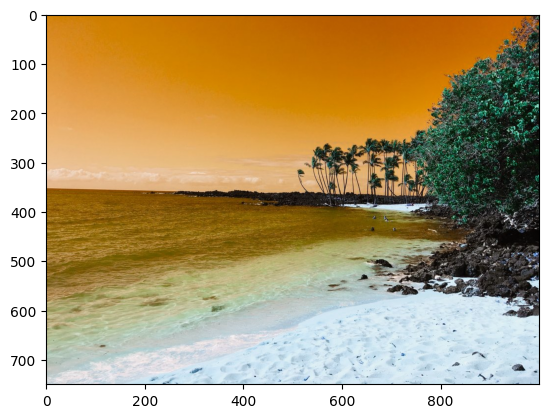

In [78]:
plt.imshow(img)
plt.show()

In [79]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
img

array([[[ 10, 130, 208],
        [ 10, 130, 208],
        [  8, 129, 208],
        ...,
        [ 60, 112, 160],
        [ 95, 146, 199],
        [ 55, 106, 159]],

       [[ 11, 131, 209],
        [ 11, 131, 209],
        [ 10, 129, 209],
        ...,
        [ 33,  78, 119],
        [ 89, 134, 176],
        [ 76, 121, 163]],

       [[ 15, 132, 211],
        [ 12, 132, 210],
        [ 11, 131, 209],
        ...,
        [ 55,  86, 107],
        [ 88, 118, 142],
        [ 66,  96, 122]],

       ...,

       [[230, 226, 217],
        [223, 219, 208],
        [216, 212, 203],
        ...,
        [228, 210, 186],
        [230, 212, 190],
        [232, 214, 192]],

       [[229, 225, 214],
        [222, 218, 206],
        [216, 212, 201],
        ...,
        [224, 206, 182],
        [227, 209, 187],
        [229, 211, 189]],

       [[227, 223, 211],
        [220, 216, 204],
        [215, 211, 199],
        ...,
        [226, 208, 184],
        [228, 210, 188],
        [230, 212, 190]]

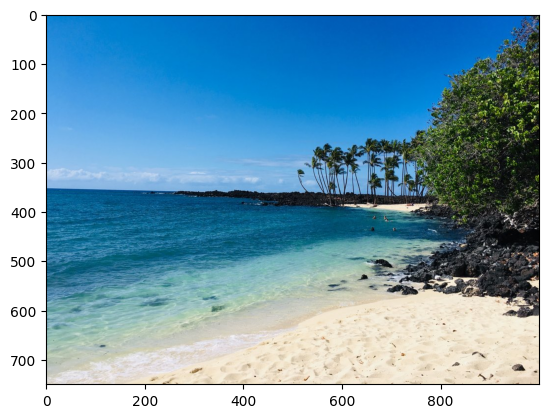

In [80]:
plt.imshow(img)
plt.show()

**Deleting specific pixels in an image.**

In [81]:
imgblack = img

In [82]:
img.shape

(750, 1000, 3)

In [83]:
img

array([[[ 10, 130, 208],
        [ 10, 130, 208],
        [  8, 129, 208],
        ...,
        [ 60, 112, 160],
        [ 95, 146, 199],
        [ 55, 106, 159]],

       [[ 11, 131, 209],
        [ 11, 131, 209],
        [ 10, 129, 209],
        ...,
        [ 33,  78, 119],
        [ 89, 134, 176],
        [ 76, 121, 163]],

       [[ 15, 132, 211],
        [ 12, 132, 210],
        [ 11, 131, 209],
        ...,
        [ 55,  86, 107],
        [ 88, 118, 142],
        [ 66,  96, 122]],

       ...,

       [[230, 226, 217],
        [223, 219, 208],
        [216, 212, 203],
        ...,
        [228, 210, 186],
        [230, 212, 190],
        [232, 214, 192]],

       [[229, 225, 214],
        [222, 218, 206],
        [216, 212, 201],
        ...,
        [224, 206, 182],
        [227, 209, 187],
        [229, 211, 189]],

       [[227, 223, 211],
        [220, 216, 204],
        [215, 211, 199],
        ...,
        [226, 208, 184],
        [228, 210, 188],
        [230, 212, 190]]

In [84]:
imgblack[0:150,250:960,::] = 50

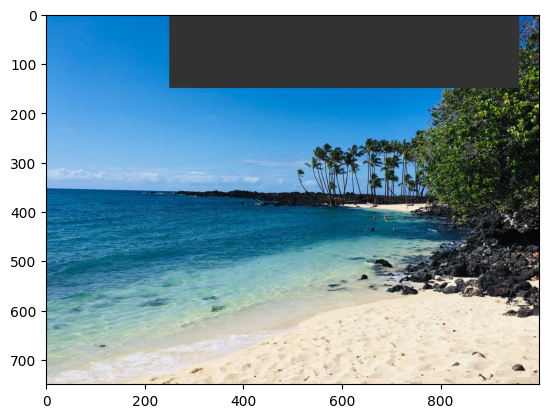

In [85]:
plt.imshow(img)
plt.show()

**Use K-Clustering to show only the 3 predominant colors in an image.**

In [105]:
img = img.reshape(-1,3)
img.shape

(750000, 3)

In [87]:
img = np.float32(img)

In [88]:
img

array([[ 10., 130., 208.],
       [ 10., 130., 208.],
       [  8., 129., 208.],
       ...,
       [226., 208., 184.],
       [228., 210., 188.],
       [230., 212., 190.]], dtype=float32)

In [89]:
plt.show()

In [90]:
img.shape

(750000, 3)

In [91]:
kmeans = KMeans(n_clusters = 3)

In [92]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)


In [93]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(img,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [94]:
ret

2116828623.0006793

In [95]:
center

array([[209.31291 , 212.62962 , 201.51463 ],
       [ 36.21482 ,  57.195984,  61.43689 ],
       [ 67.84201 , 150.56554 , 201.0325  ]], dtype=float32)

In [96]:
center = np.uint8(center)
label

array([[2],
       [2],
       [2],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [97]:
center

array([[209, 212, 201],
       [ 36,  57,  61],
       [ 67, 150, 201]], dtype=uint8)

In [98]:
res = center[label.flatten()]
img3 = res.reshape((750, 1000, 3))

In [99]:
img3


array([[[ 67, 150, 201],
        [ 67, 150, 201],
        [ 67, 150, 201],
        ...,
        [ 67, 150, 201],
        [ 67, 150, 201],
        [ 67, 150, 201]],

       [[ 67, 150, 201],
        [ 67, 150, 201],
        [ 67, 150, 201],
        ...,
        [ 36,  57,  61],
        [ 67, 150, 201],
        [ 67, 150, 201]],

       [[ 67, 150, 201],
        [ 67, 150, 201],
        [ 67, 150, 201],
        ...,
        [ 36,  57,  61],
        [ 67, 150, 201],
        [ 36,  57,  61]],

       ...,

       [[209, 212, 201],
        [209, 212, 201],
        [209, 212, 201],
        ...,
        [209, 212, 201],
        [209, 212, 201],
        [209, 212, 201]],

       [[209, 212, 201],
        [209, 212, 201],
        [209, 212, 201],
        ...,
        [209, 212, 201],
        [209, 212, 201],
        [209, 212, 201]],

       [[209, 212, 201],
        [209, 212, 201],
        [209, 212, 201],
        ...,
        [209, 212, 201],
        [209, 212, 201],
        [209, 212, 201]]

In [100]:
img3.shape

(750, 1000, 3)

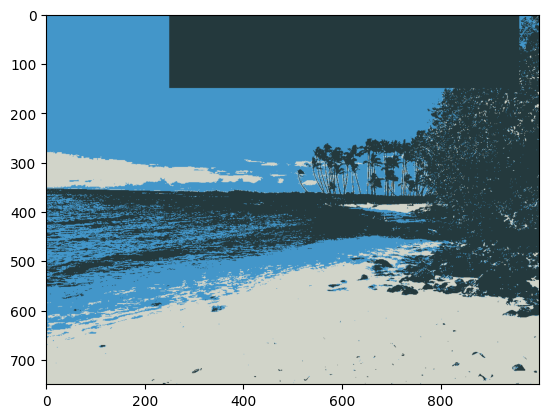

In [101]:
plt.imshow(img3)
plt.show()

In [107]:
img2 = cv.imread("lacbay.jpg")

In [111]:
face = cv.imread("family3.jpg")

In [112]:
face.shape

(183, 275, 3)

In [113]:
face=cv.cvtColor(face,cv.COLOR_BGR2RGB)

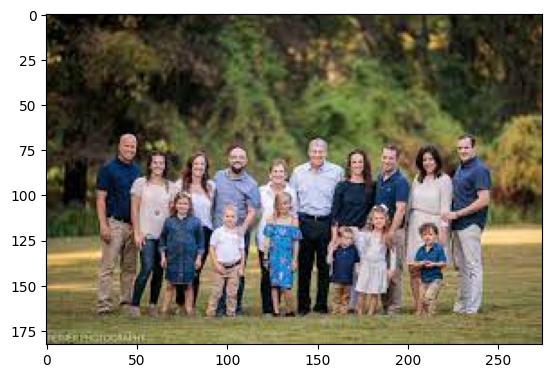

In [114]:
plt.imshow(face)
plt.show()

In [115]:
faces = face.reshape(-1,3)

In [116]:
faces.shape

(50325, 3)

In [117]:
faces = np.float32(faces)

In [118]:
kmeans = KMeans(n_clusters = 10)

In [119]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [120]:
K = 10
attempts=10
ret,label,center=cv2.kmeans(faces,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [121]:
center = np.uint8(center)
center

array([[168, 147, 127],
       [ 48,  46,  29],
       [216, 211, 224],
       [142, 132,  87],
       [111, 106,  67],
       [198, 180, 177],
       [ 78,  75,  47],
       [ 78, 118, 165],
       [ 34,  56,  86],
       [ 17,  17,  13]], dtype=uint8)

In [122]:
res = center[label.flatten()]
res.shape

(50325, 3)

In [123]:
res

array([[ 48,  46,  29],
       [ 48,  46,  29],
       [ 17,  17,  13],
       ...,
       [142, 132,  87],
       [142, 132,  87],
       [142, 132,  87]], dtype=uint8)

In [124]:
face = res.reshape((face.shape))

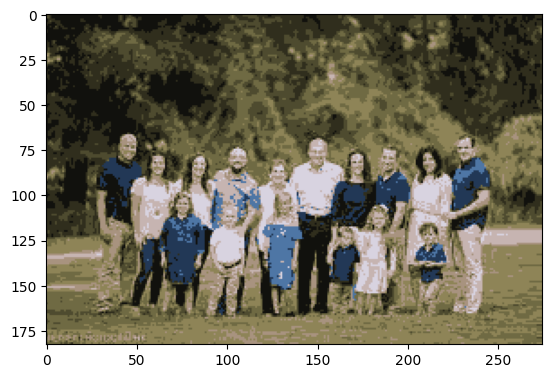

In [125]:
plt.imshow(face)
plt.show()

In [ ]:
face

**Converting all pixels that are lighter than black to white**

---



---



In [127]:
list = res.tolist()
print(list)

[[48, 46, 29], [48, 46, 29], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [48, 46, 29], [17, 17, 13], [48, 46, 29], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 17, 13], [17, 

In [128]:
len(list)

50325

In [129]:
i = 0

for x in list:
  if sum(x) > 100:
    i += 1

i

43941

In [130]:
t = 0

for x in list:
  if sum(x) < 100:
    t += 1

t

6384

In [131]:
newlst2 = [x if sum(x) < 100 else [255,255,255] for x in list]

In [132]:
z = 0

for x in newlst2:
    if sum(x) > 100:
      z += 1

z

43941

In [133]:
newlst2

[[255, 255, 255],
 [255, 255, 255],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [255, 255, 255],
 [17, 17, 13],
 [255, 255, 255],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13],
 [17, 17, 13]

In [134]:
ar = np.array(newlst2)
ar.shape

(50325, 3)

In [135]:
face = ar.reshape((face.shape))

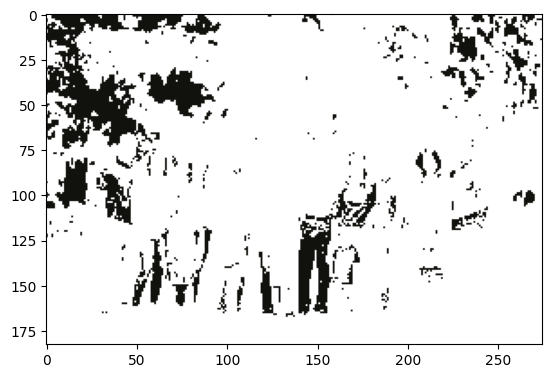

In [136]:
plt.imshow(face)
plt.show()

**Using original image and then converting to black and white**\

In [147]:
family1 = cv.imread("family1.jpg")

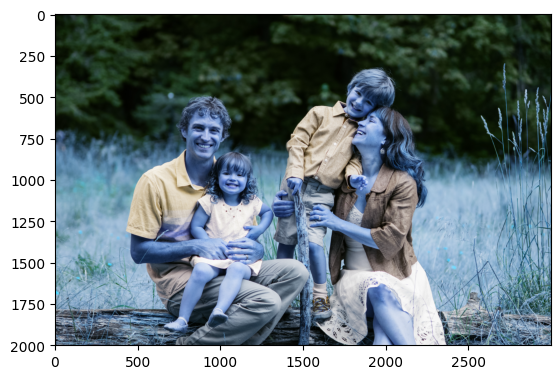

In [148]:
plt.imshow(family1)

In [149]:
family1=cv.cvtColor(family1,cv.COLOR_BGR2RGB)

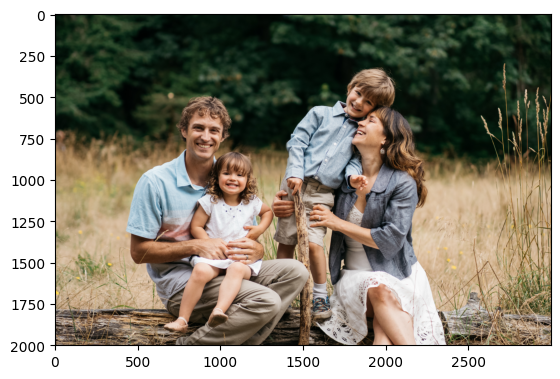

In [150]:
plt.imshow(family1)

In [151]:
family2 = family1.reshape(-1,3)

In [152]:
nested = family2.tolist()


In [153]:
nested2 = [x if sum(x) < 300 else [255,255,255] for x in nested]
ar = np.array(nested2)
family1 = ar.reshape((family1.shape))

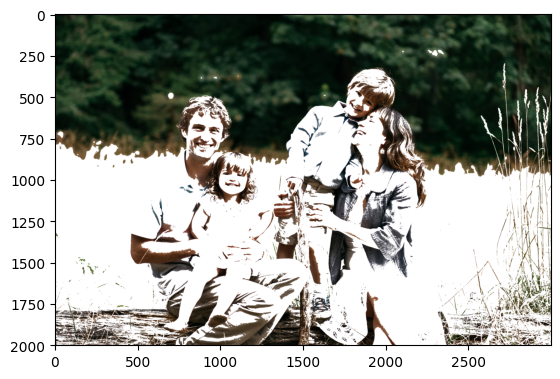

In [154]:
plt.imshow(family1)

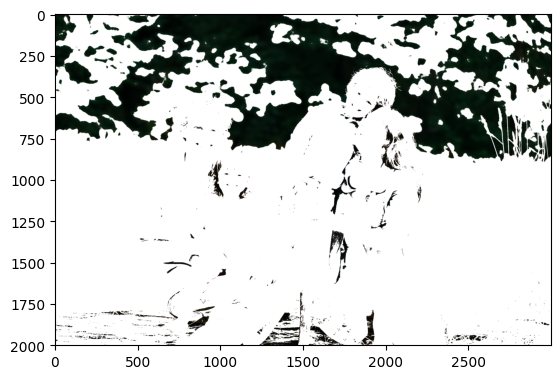

In [155]:
nested3 = [x if sum(x) < 75 else [255,255,255] for x in nested]
ar = np.array(nested3)
family1 = ar.reshape((family1.shape))
plt.imshow(family1)